# Data preparation

Script from https://python.plainenglish.io/how-to-automatically-download-bulk-images-for-your-dataset-using-python-f1efffba7a03, and adjusted to suit project. Images were also downloaded from duckduckgo using https://imgdownloader.com/

Downloads images from google

google searching for abyssinian...
<!doctype html><html lang="en" dir="ltr" itemscope itemtype="http://schema.org/SearchResultsPage"><head><base href="https://www.google.com/"><meta name="referrer" content="origin"><script data-id="_gd" nonce="a0Igmn2I0uOvtlylMnX45Q">window.WIZ_global_data = {"AY2V6d":true,"DpimGf":false,"EP1ykd":["/_/*","/buzz/c","/buzz/c/*","/cameos","/cameos/*","/cbk","/cbk/*","/coronavirus-map","/coronavirus-map/*","/covid19-map","/covid19-map/*","/covid19/exposurenotifications/select","/covid19/exposurenotifications/select/*","/display-ads-user-messaging-embed","/display-ads-user-messaging-embed/*","/finance","/finance/*","/healthinsurance/immersive","/healthinsurance/immersive/*","/history","/history/*","/ig/c","/ig/c/*","/local/business","/local/business/*","/local/cars/tools","/local/cars/tools/*","/local/follow","/local/follow/*","/local/imagery/report","/local/imagery/report/*","/local/pickup","/local/pickup/*","/local/realestate","/local/realestate/*","/loca
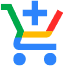
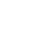
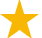
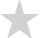
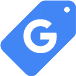
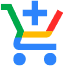
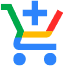
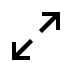

KeyboardInterrupt: 

In [22]:
from selenium import webdriver
import os
import requests
from bs4 import BeautifulSoup

# url links
google_image = "https://www.google.com/search?site=&tbm=isch&source=hp&biw=1873&bih=990&"
duckduckgo_image = "https://duckduckgo.com/"
bing_image = "https://www.bing.com/images/search?"

user_agent = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.77 Safari/537.36"
}

saved_folder = 'images'
site = 'x'

search_queries = [
'abyssinian',
'siamese',
'bengal',
]


def main(query):
    if not os.path.exists(saved_folder+'/'+query):
        os.mkdir(saved_folder+'/'+query)
    #download_bing_images(query)
    download_google_images(query)
    #download_duckduckgo_images(query)
    

def download_google_images(query):
    google_search_url = google_image + 'q=' + query
    image_class = 'rg_i Q4LuWd'
    site = 'g'
    
    print('google searching for '+query+'...')
    download(query, google_search_url, image_class)
    
# Doesnt Work
def download_duckduckgo_images(query):
    duckduckgo_search_url = duckduckgo_image + '?q=' + query + "&iax=images&ia=images"
    image_class = 'tile--img__img  js-lazyload'
    site = 'd'
    
    print(duckduckgo_search_url)
    print('duckduckgo searching for '+query+'...')
    download(query, duckduckgo_search_url, image_class)

# Doesnt work
def download_bing_images(query):
    bing_search_url = bing_image + 'q=' + query + '&first=1&tsc=ImageBasicHover'
    image_class = 'mimg'
    site = 'b'
    
    print('bing searching for '+query+'...')
    download(query, bing_search_url, image_class)

    
def download(query, search_url, image_class):
    data = query
    n_images = 200
    
    response = requests.get(search_url, headers=user_agent)

    html = response.text

    soup = BeautifulSoup(html, 'html.parser')

    results = soup.findAll('img', {'class': image_class})

    count = 1
    links = []
    for result in results:
        try:
            link = result['data-src']
            links.append(link)
            #print(links)
            count += 1
            if(count > n_images):
                break

        except KeyError:
            continue

    print(f"Downloading {len(links)} images...")

    for i, link in enumerate(links):
        response = requests.get(link)

        image_name = saved_folder + '/' + query + '/' + data + site + str(i+1) + '.jpg'

        with open(image_name, 'wb') as fh:
            fh.write(response.content)
    
#run
for query in search_queries:
    main(query)

# Data Processing

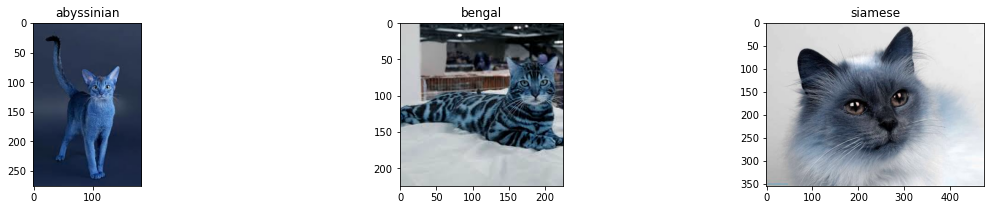

Image size: 276x183x3
Load images from abyssinian ... 
Load images from bengal ... 
Load images from siamese ... 
Load images from abyssinian ... 
Load images from bengal ... 
Load images from siamese ... 
All complete!!!


In [1]:
# Set the path for the training data images

dirtrain='images/train'
dirtest='images/test'

from stai import *
%matplotlib inline
"""
Get metadata
IMG_ROW: number of rows of images
IMG_COL: number of columns of images
CNUM   : number of channels (1: gray, 3: RGB)
"""

_, IMG_ROW, IMG_COL,CNUM =get_metadata(dirtrain)

print("Image size: %dx%dx%d"%(IMG_ROW,IMG_COL,CNUM))

#'''
#NEW_SIZE = None
NEW_SIZE = 128
x_train,y_train = load_and_resize(dirtrain,new_size = NEW_SIZE)
x_test,y_test   = load_and_resize(dirtest,new_size = NEW_SIZE)

# Normalise input to 0-1
x_train = x_train/255
x_test  = x_test/255

print("All complete!!!")
#'''

Save or load from/to file

In [4]:
import pickle
import gzip
import os

pkl_file = "data.pkl.gz"
if os.path.isfile(pkl_file):
    print("File exists, loading ...")
    with gzip.open(pkl_file, "r") as f:
        dicts = pickle.load(f)
        x_train = dicts["x_train"]
        y_train = dicts["y_train"]
        x_test  = dicts["x_test"]
        y_test  = dicts["y_test"]
    print("Loaded")
else:
    print("Saving ...")
    with gzip.open(pkl_file, "wb") as f:
        pickle.dump({"x_train":x_train,
                "y_train":y_train,
                "x_test":x_test,
                "y_test":y_test},f)
    print("Saved")

Saving ...


In [2]:
from sklearn.preprocessing import OneHotEncoder

y_train_ = [[y] for y in y_train]
y_test_  = [[y] for y in y_test]

enc = OneHotEncoder(handle_unknown = 'ignore')
enc.fit(y_train_)

# categories 
categories = enc.categories_[0]
print(categories)
# convert to onehot vector
y_train_onehot = enc.transform(y_train_).toarray()
y_test_onehot  = enc.transform(y_test_).toarray()

print("Shape of y_train_onehot")
print(y_train_onehot.shape)
print("Shape of y_test_onehot")
print(y_test_onehot.shape)

['abyssinian' 'bengal' 'siamese']
Shape of y_train_onehot
(404, 3)
Shape of y_test_onehot
(37, 3)


Random (scaled & normalised) image


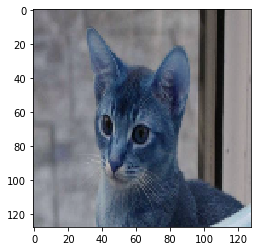

Shape of x_train
(404, 128, 128, 3)


In [5]:
import random
from matplotlib import pyplot as plt

ran = random.randint(0,x_train.shape[0]);

print("Random (scaled & normalised) image")
plt.imshow(x_train[ran,:,:,:], interpolation='nearest')
plt.show()
print("Shape of x_train")
print(x_train.shape)

# Model

Define the model's architecture

In [6]:
seed_value= 0


import os
import random
import tensorflow as tf
from tensorflow.keras import layers,models,utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

os.environ['PYTHONHASHSEED']=str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)


INP_SHAPE = (x_train.shape[1],x_train.shape[2],x_train.shape[3])
CLASS_SIZE = len(categories)

# worst
def cnn1():
    model=Sequential()
    model.add(Convolution2D(32,(4,4),padding='same',input_shape=INP_SHAPE,activation='relu'))
    model.add(MaxPooling2D(pool_size=(4,4)))
    model.add(Flatten())
    model.add(Dense(128,activation='relu'))
    model.add(Dense(CLASS_SIZE,activation='sigmoid'))
    return model

def cnn2():
    model=Sequential()

    model.add(Convolution2D(32,(4,4),padding='same',input_shape=INP_SHAPE,activation='relu'))
    model.add(MaxPooling2D(pool_size=(4,4)))
    model.add(Convolution2D(196,(5,5), padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=(4,4),strides=(3,3)))
    model.add(Flatten())
    model.add(Dense(128,activation='relu'))
    model.add(Dense(CLASS_SIZE,activation='sigmoid'))
    return model

#best
def cnn3():
    model=Sequential()
    
    model.add(Convolution2D(32,(4,4),padding='same',input_shape=INP_SHAPE,activation='relu'))
    model.add(MaxPooling2D(pool_size=(4,4)))
    model.add(Convolution2D(196,(5,5), padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=(4,4),strides=(3,3)))
    model.add(Dense(256,activation='relu'))
    model.add(tf.keras.Input(shape=INP_SHAPE))
    model.add(Flatten())
    model.add(Dense(196,activation='relu'))
    model.add(Dense(96,activation='relu'))
    model.add(Dense(CLASS_SIZE,activation='softmax'))
    return model

Compile and fit the model

In [7]:
from tensorflow.keras import optimizers

#model = cnn1() #Worst
#model = cnn2()
model = cnn3() #Best

opt =  optimizers.Adam(lr=0.001)

model.compile(loss='categorical_crossentropy',optimizer = opt,metrics=['accuracy'])

#Display summary
model.summary()

#Fit Model                                   
train_hist=model.fit(x_train,y_train_onehot,batch_size=8,
                     epochs=20,verbose=1,
                     validation_split=0.15,
                     shuffle=True)

loss, acc = model.evaluate(x_test,y_test_onehot, verbose=1)

print("Model's accuracy: {:5.2f}%".format(100*acc))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 196)       156996    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 196)       0         
_________________________________________________________________
dense (Dense)                (None, 10, 10, 256)       50432     
_________________________________________________________________
input_1 (InputLayer)         multiple                  0         
_________________________________________________________________
flatten (Flatten)            (None, 25600)             0

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


43/43 [==============================] - 6s 131ms/step - loss: 1.0436 - accuracy: 0.4140 - val_loss: 1.2262 - val_accuracy: 0.4098
Epoch 2/20
43/43 [==============================] - 6s 140ms/step - loss: 0.7143 - accuracy: 0.6910 - val_loss: 0.8685 - val_accuracy: 0.7213
Epoch 3/20
43/43 [==============================] - 7s 167ms/step - loss: 0.5062 - accuracy: 0.7959 - val_loss: 0.4000 - val_accuracy: 0.9180
Epoch 4/20
43/43 [==============================] - 7s 173ms/step - loss: 0.4905 - accuracy: 0.8367 - val_loss: 0.5453 - val_accuracy: 0.7705
Epoch 5/20
43/43 [==============================] - 7s 174ms/step - loss: 0.3984 - accuracy: 0.8455 - val_loss: 2.2837 - val_accuracy: 0.4098
Epoch 6/20
43/43 [==============================] - 7s 170ms/step - loss: 0.2685 - accuracy: 0.9009 - val_loss: 1.3496 - val_accuracy: 0.6230
Epoch 7/20
43/43 [==============================] - 7s 163ms/step - loss: 0.1594 - accuracy: 0.9300 - val_loss: 1.4324 - val_accuracy: 0.6230
Epoch 8/20
43/43 

Plot the model's accuracy and loss for both the training and validation sets

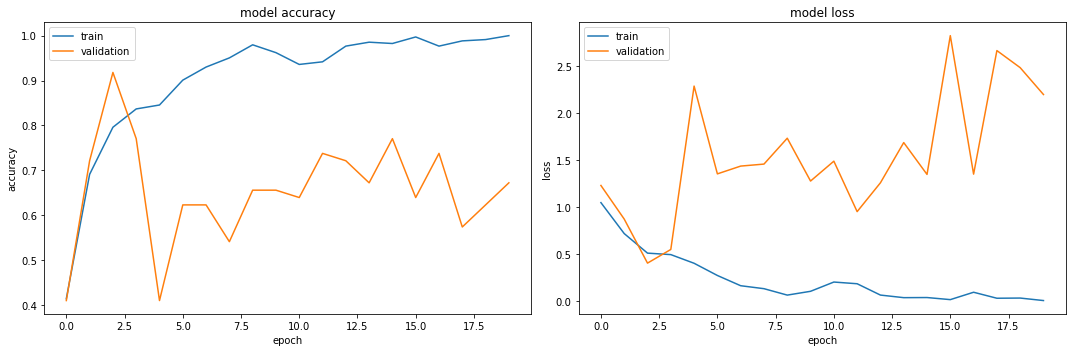

In [8]:
fig, axs = plt.subplots(1,2,figsize=(15,5))

# Show the training accuracy 
axs[0].plot(train_hist.history['accuracy'])
axs[0].plot(train_hist.history['val_accuracy'])
axs[0].set_title('model accuracy')
axs[0].set_ylabel('accuracy')
axs[0].set_xlabel('epoch')
axs[0].legend(['train', 'validation'])

# Show the training loss
axs[1].plot(train_hist.history['loss'])
axs[1].plot(train_hist.history['val_loss'])
axs[1].set_title('model loss')
axs[1].set_ylabel('loss')
axs[1].set_xlabel('epoch')
axs[1].legend(['train', 'validation'])

plt.tight_layout()
plt.show()

Export Model

In [17]:
# save model and architecture
model.save("model.h5")
print("Saved model to disk")

Saved model to disk


Load Model
(!!! LOAD DATASET FIRST !!!)

In [1]:
from numpy import loadtxt
from tensorflow.keras.models import load_model
 
# load model
model = load_model('model.h5')
# summarize model.
model.summary()
# evaluate the model
score = model.evaluate(x_test,y_test_onehot, verbose=1)
print("Model's accuracy: {:5.2f}%".format(100*score[1]))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 196)       156996    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 196)       0         
_________________________________________________________________
dense (Dense)                (None, 10, 10, 256)       50432     
_________________________________________________________________
input_1 (InputLayer)         multiple                  0         
_________________________________________________________________
flatten (Flatten)            (None, 25600)             0

NameError: name 'x_test' is not defined